# Question 5 Part 2

## Description

Load MISNT Data Set, extract 3 and 7 training images then calculate the average of them, then extract 3 and 7 test images and compare them using MSE and PSNR with training average

## Import required dependencies

- Import os to use IO function such as check file exist
- Import gzip to decompress data set
- Import math to get the maximum number we can use as infinite
- Import pickle to load pkl file
- Import requests to fetch data set from source
- Import numpy to work with arrays
- Import matplotlib to show image for each step

In [1]:
import os
import gzip
import math
import pickle
import requests
import numpy as np
import matplotlib.pyplot as plt

## MNIST Data Set Source Info

In [2]:
url_base = 'http://yann.lecun.com/exdb/mnist/'
key_file = {
    'train_img': 'train-images-idx3-ubyte.gz',
    'train_label': 'train-labels-idx1-ubyte.gz',
    'test_img': 't10k-images-idx3-ubyte.gz',
    'test_label': 't10k-labels-idx1-ubyte.gz'
}

## Fetch and Load Data Set Function

Following code copy from internet to fetch and load data set

In [3]:
def load_images(file_name):
    file_path = "./" + file_name

    with gzip.open(file_path, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=16)
    data = data.reshape(-1, 784)

    return data


def load_labels(file_name):
    file_path = "./" + file_name

    with gzip.open(file_path, 'rb') as f:
        labels = np.frombuffer(f.read(), np.uint8, offset=8)

    return labels


def init_mnist():
    for file_name in key_file.values():
        file_path = "./" + file_name

        if os.path.exists(file_path):
            continue

        with requests.get(url_base + file_name, stream=True) as r:
            r.raise_for_status()
            with open(file_path, 'wb') as f:
                for chunk in r.iter_content(chunk_size=8192):
                    f.write(chunk)
    dataset = {
        'train_img': load_images(key_file['train_img']),
        'train_label': load_labels(key_file['train_label']),
        'test_img': load_images(key_file['test_img']),
        'test_label': load_labels(key_file['test_label'])
    }

    with open("./mnist.pkl", 'wb') as f:
        pickle.dump(dataset, f, -1)

def load_mnist():
    if not os.path.exists("./mnist.pkl"):
        init_mnist()

    with open("./mnist.pkl", 'rb') as f:
        dataset = pickle.load(f)

    for key in ('train_img', 'test_img'):
        dataset[key] = dataset[key].astype(np.float32)
        dataset[key] /= 255.0

    for key in ('train_img', 'test_img'):
        dataset[key] = np.reshape(dataset[key], (-1, 28, 28))

    return (dataset['train_img'], dataset['train_label']), (dataset['test_img'], dataset['test_label'])

## Load MNIST Data Set

In [4]:
(x_train, t_train), (x_test, t_test) = load_mnist()

## 7, 3 Training Images

In [5]:
train_7 = x_train[t_train == 7]
train_3 = x_train[t_train == 3]

## Calculate Average Of The Training Images

In [6]:
train_avg_7 = np.zeros((28, 28))
for train in train_7:
    train_avg_7 += train / len(train_7)

train_avg_3 = np.zeros((28, 28))
for train in train_3:
    train_avg_3 += train / len(train_3)

## Define MSE Calculation Function

The MSE measures the average of the squares of the errors

In [7]:
def mse(image_1, image_2):
    return ((image_1 - image_2) ** 2).sum() / \
        (image_1.shape[0] * image_1.shape[1])

## Define PSNR Calculation Function

PSNR represents a measure of the peak error. The lower the value of MSE, the lower the error

In [8]:
def psnr(image_1, image_2):
    mse_value = mse(image_1, image_2)

    if mse_value == 0:
        return math.inf

    return 10 * np.log((255 ** 2) / mse_value)

## 7, 3 Testing Images

In [9]:
test_7 = x_test[t_test == 7]
test_3 = x_test[t_test == 3]

## Calculate MSE And PNSR Of Test Images With Training Average

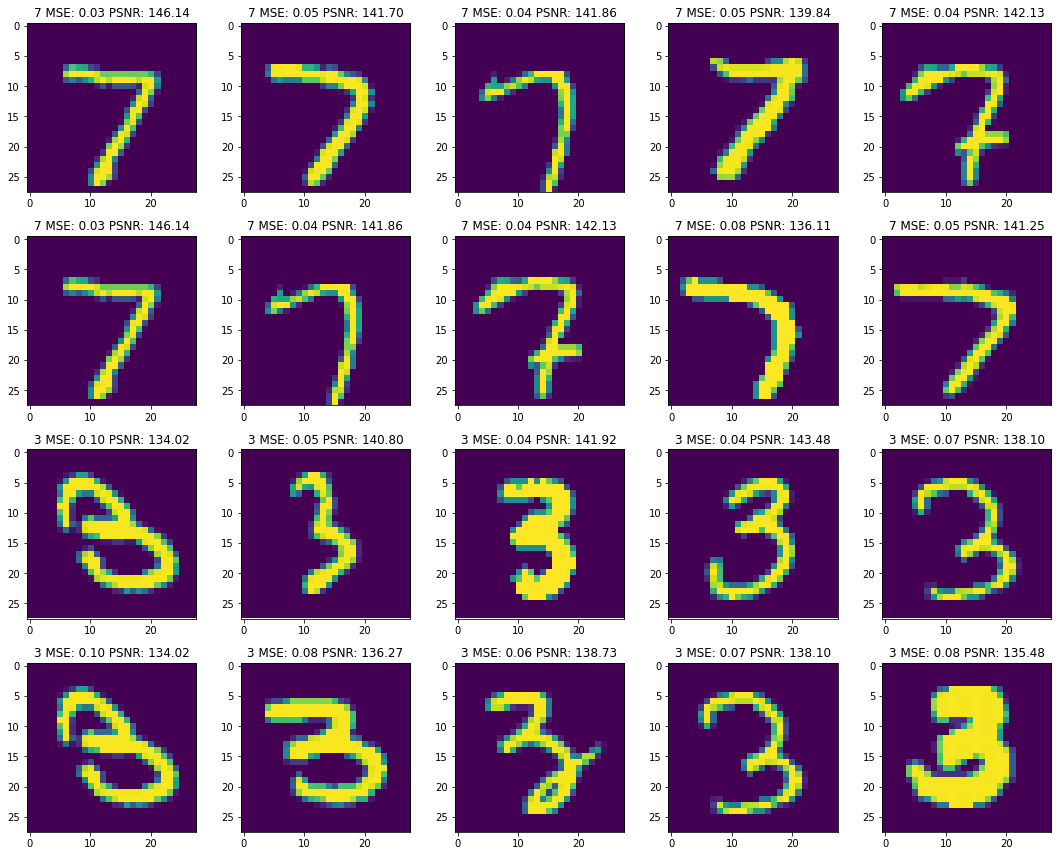

In [10]:
f, subplt = plt.subplots(4, 5, figsize=(15, 12))
plt.tight_layout()

for j in range(1, 5):
    if j < 3:
        for i in range(5):
            mse_value = mse(train_avg_7, test_7[i * j])
            psnr_value = psnr(train_avg_7, test_7[i * j])

            subplt[j - 1][i].imshow(test_7[i * j])
            subplt[j - 1][i].set_title("7 MSE: {:.2f} PSNR: {:.2f}".format(mse_value, psnr_value))
    else:
        for i in range(5):
            mse_value = mse(train_avg_3, test_3[i * j])
            psnr_value = psnr(train_avg_3, test_3[i * j])

            subplt[j - 1][i].imshow(test_3[i * j])
            subplt[j - 1][i].set_title("3 MSE: {:.2f} PSNR: {:.2f}".format(mse_value, psnr_value))

As result, The test images are very similar to average of the training image

we can compare image with average of the training image with a threshold to detect numbers